In [1]:
#Import necessary modules
#pandas
#scipy
#matplotlib
#numpy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


In [2]:
#pull necessary csv "../Resources/State_Median_Income.csv"
income = pd.read_csv("Resources/State_Median_Income.csv")
income

#import csv as dataframe
income_df = pd.DataFrame(income)
income_df

,State,2019 Median income,2019 Standard error,2018 Median income,2018 Standard error,Median income,Standard error,2017 Median income,2017 Standard error,2016 Median income,...,Median income.12,Standard error.14,Median income.13,Standard error.15,Median income.14,Standard error.16,Median income.15,Standard error.17,Median income.16,Standard error.18
0,United States,68703,550,63179,420,61136,322,61372,335,59039,...,27225,139,26061,127,24897,129,23618,128,22415,102
1,Alabama,56200,2512,49936,2423,50865,1094,51113,845,47221,...,19948,912,19734,1147,19132,885,18333,760,17310,605
2,Alaska,78394,6685,68734,3390,77987,3718,72231,2719,75723,...,33103,1183,33233,1497,31356,1017,34782,1089,32356,1473
3,Arizona,70674,3391,62283,2291,59700,2689,61125,2642,57100,...,26435,843,26749,892,25500,718,23877,744,21425,609
4,Arkansas,54539,2384,49781,2108,49751,2491,48829,2642,45907,...,20172,706,18827,1008,18730,765,17451,764,15674,748
5,California,78105,1850,70489,1233,70038,1576,69759,1452,66637,...,30287,634,30146,538,29010,570,26981,350,25287,364
6,Colorado,72499,5221,73034,3562,74984,2661,74172,2982,70566,...,26214,1285,26476,1075,27192,926,28182,850,25801,805
7,Connecticut,87291,4630,72812,5119,74304,3453,72780,3509,75923,...,36213,1293,32862,1362,32721,1605,31090,1129,29951,1238
8,Delaware,74194,3009,65012,3599,64961,5230,62318,3300,58046,...,30505,1167,29244,875,25626,1212,22980,1366,25819,1027
9,District of Columbia,93111,3884,85750,2659,81282,1903,83382,3319,70982,...,26741,748,27455,1285,24322,1252,21076,756,20408,860


In [3]:
# Get a list of all of our columns for easy reference
income_df.columns

Index(['State', '2019 Median income', '2019 Standard error',
       '2018 Median income', '2018 Standard error', 'Median income',
       'Standard error', '2017 Median income', '2017 Standard error',
       '2016 Median income', '2016 Standard error', '2015 Median income',
       '2015 Standard error', '2014 Median income', '2014 Standard error',
       '2013 Median income', 'Standard error.1', '2013 Median income.1',
       'Standard error.2', '2012 Median income', '2012 Standard error',
       '2011 Median income', '2011 Standard error', '2010 Median income',
       '2010 Standard error', '2009 Median income', '2009 Standard error',
       '2008 Median income', '2008 Standard error', '2007 Median income',
       '2007 Standard error', '2006 Median income', '2006 Standard error',
       '2005 Median income', '2005 Standard error', '2004 Median income',
       '2004 Standard error', '2003 Median income', '2003 Standard error',
       '2002 Median income', '2002 Standard error', '2001 M

In [4]:
#convert to float so we can analyze
cleaned_income_df = income_df.loc[:, ["2019 Median income", "2018 Median income", "2017 Median income", "2016 Median income", "2015 Median income", "2014 Median income", "2013 Median income", "2012 Median income", "2011 Median income", "2010 Median income", "2009 Median income"]].astype(float)

#clean dataframe, only need years 2009+, state name 
cleaned_income_df = income_df.loc[:, ["State", "2019 Median income", "2018 Median income", "2017 Median income", "2016 Median income", "2015 Median income", "2014 Median income", "2013 Median income", "2012 Median income", "2011 Median income", "2010 Median income", "2009 Median income"]]

#print dataframe
cleaned_income_df

,State,2019 Median income,2018 Median income,2017 Median income,2016 Median income,2015 Median income,2014 Median income,2013 Median income,2012 Median income,2011 Median income,2010 Median income,2009 Median income
0,United States,68703,63179,61372,59039,56516,53657,53585,51017,50054,49276,49777
1,Alabama,56200,49936,51113,47221,44509,42278,47320,43464,42590,40933,39980
2,Alaska,78394,68734,72231,75723,75112,67629,72472,63648,57431,57848,61604
3,Arizona,70674,62283,61125,57100,52248,49254,52611,47044,48621,46896,45739
4,Arkansas,54539,49781,48829,45907,42798,44922,39376,39018,41302,38587,36538
5,California,78105,70489,69759,66637,63636,60487,60794,57020,53367,54283,56134
6,Colorado,72499,73034,74172,70566,66596,60940,67912,57255,58629,60233,55930
7,Connecticut,87291,72812,72780,75923,72889,70161,69291,64247,65415,65998,64851
8,Delaware,74194,65012,62318,58046,57756,57522,54091,48972,54660,55214,52114
9,District of Columbia,93111,85750,83382,70982,70071,68277,60057,65246,55251,56928,53141


In [5]:
# Using GroupBy in order to separate the data into fields according to "State" values
grouped_income_df = cleaned_income_df.groupby('State')


In [6]:
#calculate average of each state over time
#average_df = grouped_income_df.mean()
#average_df

average_income_df = grouped_income_df.mean()
average_income_df



,2019 Median income,2018 Median income,2017 Median income,2016 Median income,2015 Median income,2014 Median income,2013 Median income,2012 Median income,2011 Median income,2010 Median income,2009 Median income
State,,,,,,,,,,,
Alabama,56200,49936,51113,47221,44509,42278,47320,43464,42590,40933,39980
Alaska,78394,68734,72231,75723,75112,67629,72472,63648,57431,57848,61604
Arizona,70674,62283,61125,57100,52248,49254,52611,47044,48621,46896,45739
Arkansas,54539,49781,48829,45907,42798,44922,39376,39018,41302,38587,36538
California,78105,70489,69759,66637,63636,60487,60794,57020,53367,54283,56134
Colorado,72499,73034,74172,70566,66596,60940,67912,57255,58629,60233,55930
Connecticut,87291,72812,72780,75923,72889,70161,69291,64247,65415,65998,64851
Delaware,74194,65012,62318,58046,57756,57522,54091,48972,54660,55214,52114
District of Columbia,93111,85750,83382,70982,70071,68277,60057,65246,55251,56928,53141


In [7]:
#find the average income over all years

average_income_df['Average over 10 years'] = average_income_df.mean(axis=1)
final_average_df = average_income_df['Average over 10 years']
final_average_df = final_average_df.round(2)
final_average_df = final_average_df.to_frame()

final_average_df = final_average_df.reindex(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

final_average_df

,Average over 10 years
State,
United States,56015.91
Alabama,45958.55
Alaska,68256.91
Arizona,53963.18
Arkansas,43781.55
California,62791.91
Colorado,65251.45
Connecticut,71059.82
Delaware,58172.64


In [8]:
#identify 5 highest average income (sort)
highest_median_income_df = final_average_df.sort_values(['Average over 10 years'], ascending=False)
top_5_df = highest_median_income_df.head(5)
top_5_df

,Average over 10 years
State,
Maryland,74986.36
New Hampshire,72903.73
Connecticut,71059.82
District of Columbia,69290.55
Massachusetts,69123.82


In [9]:
#identify 5 lowest average income
lowest_median_income_df = final_average_df.sort_values(['Average over 10 years'], ascending=True)
bottom_5_df = lowest_median_income_df.head(5)
bottom_5_df

,Average over 10 years
State,
Mississippi,39179.36
Arkansas,43781.55
Louisiana,44273.45
West Virginia,44373.73
Kentucky,45608.73


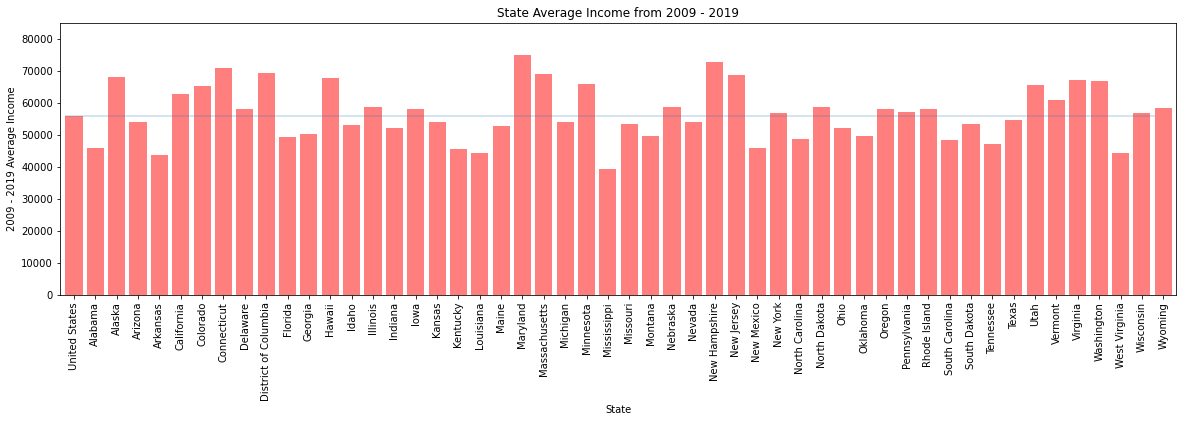

In [13]:
#Visualizations

#bar graph, country vs all

x_axis = np.arange(len(final_average_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,5))
plt.bar(x_axis, final_average_df["Average over 10 years"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, final_average_df.index, rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(final_average_df["Average over 10 years"])+10000)
plt.title("State Average Income from 2009 - 2019")
plt.xlabel("State")
plt.ylabel("2009 - 2019 Average Income")
plt.hlines(final_average_df.iloc[0,0], 0, 51, alpha = 0.25)
plt.savefig("national_income_average.png")
plt.show()

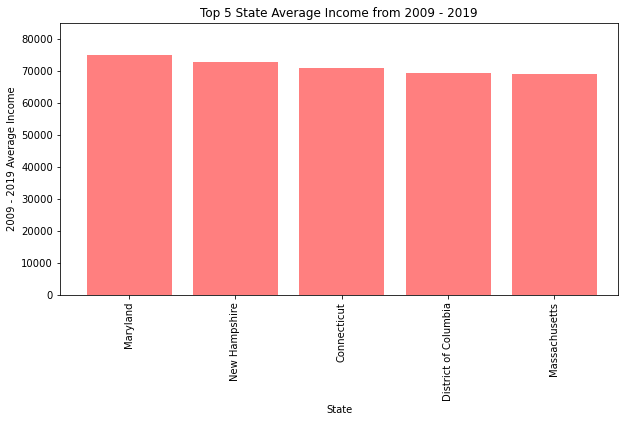

In [14]:
#Visualizations

#bar graph, top 5

x_axis = np.arange(len(top_5_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, top_5_df["Average over 10 years"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, top_5_df.index, rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(top_5_df["Average over 10 years"])+10000)
plt.title("Top 5 State Average Income from 2009 - 2019")
plt.xlabel("State")
plt.ylabel("2009 - 2019 Average Income")
plt.savefig("top5_income_average.png")
plt.show()


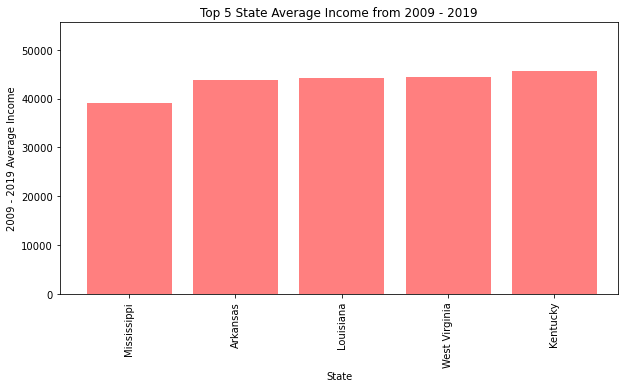

In [15]:
#Visualizations

#bar graph, bottom 5

x_axis = np.arange(len(top_5_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, bottom_5_df["Average over 10 years"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, bottom_5_df.index, rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(bottom_5_df["Average over 10 years"])+10000)
plt.title("Top 5 State Average Income from 2009 - 2019")
plt.xlabel("State")
plt.ylabel("2009 - 2019 Average Income")
plt.savefig("bottom5_income_average.png")
plt.show()

Analysis: